In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

In [2]:
# set gotm
gotm_root = os.environ['HOME']+'/scratch/saildrone_southern_ocean/gotm/run/ERA5_plus_STD'
prefix_list = [filename for filename in os.listdir(gotm_root) if filename.startswith('C')]
filename = 'gotm_out.nc'

In [3]:
tidx = -48
dat = {}
clabels = set()
mlabels = set()
hlabels = set()
tlabels = set()
for casename in prefix_list:
#     print(casename)
    casestring, mlabel = casename.split('_')
    clabel, _, hlabel, _, tlabel = casestring.split('-')
    sim = Simulation(path=gotm_root+'/'+casename)
    dataset = sim.load_data()
    heatflux = dataset.data_vars['heat'][0,0,0].values
    tau = dataset.data_vars['tx'][0,0,0].values
    rho = dataset.data_vars['rho'][:,:,0,0]
    time = dataset.time
    mld = -get_mld_deltaR(rho)
    mldavg = mld[tidx:].mean().values
    tmp = {
        'clabel': clabel,
        'hlabel': hlabel,
        'tlabel': tlabel,
        'mlabel': mlabel,
        'heat':   float(heatflux),
        'tau':    float(tau),
        'mldavg': float(mldavg),
        }
    dat[casename] = tmp
    clabels.add(clabel)
    mlabels.add(mlabel)
    hlabels.add(hlabel)
    tlabels.add(tlabel)

In [4]:
tlabels

{'0', 'm1', 'm2', 'm3', 'p1', 'p2', 'p3'}

In [5]:
hlabels

{'0', 'm1', 'm2', 'm3', 'p1', 'p2', 'p3'}

['C0030', 'C0133', 'C0236', 'C0339', 'C0442', 'C0545', 'C0648', 'C0751', 'C0854']


Text(0, 0.5, 'MLD (m)')

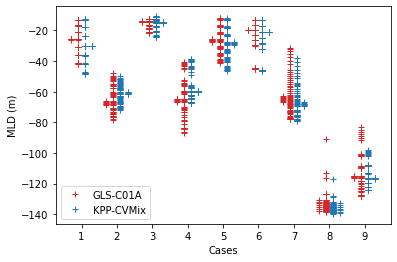

In [6]:
clabelslst = list(clabels)
clabelslst.sort()
print(clabelslst)
nc = len(clabelslst)
xx = np.arange(nc)+1
xxc = dict(zip(clabelslst, xx))
for casename in prefix_list:
    clabel = dat[casename]['clabel']
    mlabel = dat[casename]['mlabel']
    tlabel = dat[casename]['tlabel']
    hlabel = dat[casename]['hlabel']
    mld = dat[casename]['mldavg']
    if mlabel == 'GLS-C01A':
        mcolor = 'tab:red'
        xshift = -0.1
    elif mlabel == 'KPP-CVMix':
        mcolor = 'tab:blue'
        xshift = 0.1
    plt.plot(xxc[clabel]+xshift, mld, '+', color=mcolor )
    if tlabel == '0':
        plt.plot(xxc[clabel]+xshift*3, mld, '+', color=mcolor )
plt.plot(np.nan, np.nan, '+', color='tab:red', label='GLS-C01A')
plt.plot(np.nan, np.nan, '+', color='tab:blue', label='KPP-CVMix')
plt.legend(loc='lower left')
plt.xticks(xx)
plt.xlabel('Cases')
plt.ylabel('MLD (m)')